# PCLab#3 - Group 7 - Di Palo Nobile Terraneo

In [80]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

## Task 1 - Basic manipulation and descriptive analysis

In [28]:
data = pd.read_csv('Data_PCLab3_Twitter_Stock_Sentiment.csv')
data.head()


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [29]:
data.isnull().any()

Text         False
Sentiment    False
dtype: bool

In [30]:
# Number of tweets
print(len(data))

5791


In [31]:
# Creating a list with the number of words per each tweet
tot = len(data)
words = []
for i in range(tot):
    words.append(len(data.Text[i].split()))

In [32]:
# Adding a column to dataframe with the number of words per each tweet before cleaning
data['Words_pre'] = words
data.head()

,Text,Sentiment,Words_pre
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,20
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,16
2,user I'd be afraid to short AMZN - they are lo...,1,18
3,MNTA Over 12.00,1,3
4,OI Over 21.37,1,3


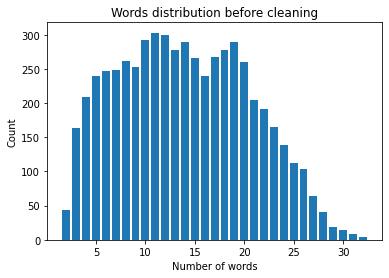

In [69]:
# Plotting the words distribution before cleaning
plt.bar(x = data['Words_pre'].value_counts().index, height = data['Words_pre'].value_counts())
plt.ylabel('Count')
plt.xlabel('Number of words')
plt.title('Words distribution before cleaning')
plt.show()

In [35]:
# Average number of words per tweet before cleaning
print('Average number of words before cleaning =', round(data.Words_pre.mean(),3))

Average number of words before cleaning = 14.009


In [42]:
# Average sentiment

print('Average sentiment=',round(data.Sentiment.mean(),4))
print('')
print(data.Sentiment.value_counts())

Average sentiment= 0.6363

1    3685
0    2106
Name: Sentiment, dtype: int64


In [ ]:
# Statistics


## Task 2 - Cleaning and visualization

In order to reduce the variance of the text and obtain a clear result, the main preprocessing steps I go through are obtained with a main function that includes all the operations:

normalization to lowercase
removal of web links
removal of numbers
removal of punctuation
removal of the acronym CNN that is present sometimes
removal of stopwords and of words with less that 2 characters
lemmatization
Therefore, out of the main function there is the tokenization of the text and the removal of the word say, that after an initial analysis resulted as the most used. However, I consider it useless for my goals so I delete it.

Preprocessing ends with the selection of collocations which are then replaced in the text.

In [104]:
# Define a preprocess function

def preprocess(input_text ):
    """This function will allow us to perform all the preprocessing steps to reduce noise in text data. This is fundamental to perform text analysis.
    To make the function work is necessary to import the nlp & re module.
    The function will return """
    
    # Normalize to lowercase
    txt = input_text.lower()
    
    # Remove URLs
    txt = re.sub('https?://\S+|www\.\S+', '', txt)

    # Remove numbers
    txt = re.sub(r"\d", "", txt)
    
    # Remove punctuation
    txt = re.sub('\n', '', txt)
    txt = re.sub(r"[^A-Za-z]+", " ", txt)  
    
    # Remove stopwords
    stop_words = [w.lower() for w in stopwords.words('english')]
    stop_words = set(stop_words).difference(set(['against','above','below', 'over', 'under']))
    txt = ' '.join([w for w in txt.split() if w not in stop_words and w !='user'])
    
    # Lemmatization
    lemmas = [token.lemma_ for token in nlp(txt)]
    txt = " ".join(lemmas)
    
    return txt

In [72]:
documents = data["Text"].tolist()

In [107]:
%time clean_des = [preprocess(string) for string in documents[:]]

Wall time: 33.5 s


In [106]:
sentence = '$I love AI & Machine learning applied to Finance...!! ;)'
sen = preprocess(sentence)
sen

'love ai machine learn apply finance'

In [108]:
documents

['Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts',
 'user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year.  AWESOME.  ',
 "user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service",
 'MNTA Over 12.00  ',
 'OI  Over 21.37  ',
 'PGNX  Over 3.04  ',
 'AAP - user if so then the current downtrend will break. Otherwise just a short-term correction in med-term downtrend.',
 "Monday's relative weakness. NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB  ",
 'GOOG - ower trend line channel test & volume support.   ',
 'AAP will watch tomorrow for ONG entry.',
 "i'm assuming FCX opens tomorrow above the 34.25 trigger buy. still very much like this setup.  ",
 'It really worries me how everyone expects the market to rally now,usually exact opposite happens every time we shall see soon bac spx jpm',
 "AAP GAMCO's arry Haverty : Apple Is Extremely Cheap  Great Video !!!"

In [109]:
clean_des

['kickers watchlist xide tit soq pnk cpw bpz aj trade method method see prev post',
 'aap movie return fea geed indicator trade year awesome',
 'afraid short amzn look like near monopoly ebooks infrastructure service',
 'mnta over',
 'oi over',
 'pgnx over',
 'aap current downtrend break otherwise short term correction med term downtrend',
 'monday relative weakness nyx win tie tap ice int bmc aon c chk biib',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 'assume fcx open tomorrow above trigger buy still much like setup',
 'really worry everyone expect market rally usually exact opposite happen every time shall see soon bac spx jpm',
 'aap gamco arry haverty apple extremely cheap great video',
 'maykiljil post agree msft go higher possibly north',
 'momentum come back etfc break resistance solid volume friday ong set',
 'ha hit mean resume target level',
 'gameplan shoot today like trend break may c h break oc weekly trend break back july',
 'fc

## Task 3 - Sentiment Analysis

## Task 4 - Sentiment Analysis - Optional

## Task 5 - Measuring media attention